In [1]:
# Import libraries and dataset
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# We will be using make_circles from scikit-learn
from sklearn.datasets import make_circles

SEED = 2017

In [2]:
# First, we need to create the training data
# We create an inner and outer circle

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2017)
outer = y == 0
inner = y == 1

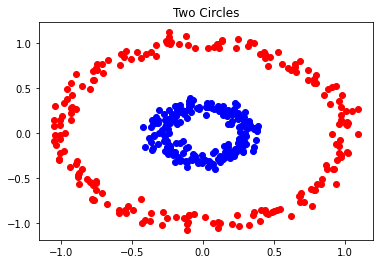

In [3]:
# Let's plot the data to show the two classes

plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

# Example of non-linearly separable data

In [4]:
# We normalize the data to make sure the center of both circles is (1,1)

X = X+1

In [5]:
# To determine the performance of our algorithm we split our data

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [7]:
# A linear activation function won't work in this case, so we'll be using a sigmoid function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# Next, we define the hyperparameters

n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1

In [9]:
# Initialize the weights and other variables

# Initialise weights
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []
print(weights_hidden)
print(weights_output)

[[ 0.02973672  1.96873185  0.93716128  0.0819987  -0.79837987  0.27740856
  -0.4596743  -1.81195114  0.97773437  0.13792823  1.04919979  1.12313636
   0.54645529  1.34803925 -0.37544688 -0.39594891 -0.11535304 -0.80940096
   0.02442926 -0.0294276   1.19911188 -0.63999054 -0.43657454  0.31780473
  -1.18994763  0.42130269 -1.72468566  0.00305664  1.1584194   1.61009476
   0.73057578 -0.12362306 -0.54981476 -0.15767085 -0.38813085  0.07245643
  -0.83494441 -1.49298996 -0.56912016  0.10858602 -0.9901386   0.20305085
   1.35810226  1.26967753 -0.02640194 -1.66815968 -0.77096094 -0.19153638
   0.31275541  0.53289125]
 [-1.74694077  0.26134012 -0.5679315  -1.02333135  2.41133176 -2.07580204
  -0.38638051 -0.02067128 -1.630263   -0.07095132  0.277637   -0.69544116
   0.005967   -0.66555671 -0.39571363  1.24041821  0.95766917  0.55722341
   2.07755315 -0.74686394  0.13342871  0.16699364  0.22174064  0.24573025
   0.65691202  0.52981706 -0.74561458 -0.56056793 -0.90414802  0.22506549
   0.025447

In [10]:
# Run the single-layer neural network and output the statistics

for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        # Forward computations
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))

        # Backward computations
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]

    # Update weights
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]

    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        hidden_output = sigmoid(np.dot(X_val, weights_hidden))
        out = sigmoid(np.dot(hidden_output, weights_output))
        loss = np.mean((out - y_val) ** 2)
        # Final prediction is based on a threshold of 0.5
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ", '{:>4}'.format(e), 
            "; Validation loss: ", '{:>6}'.format(loss.round(4)), 
            "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

Epoch:     0 ; Validation loss:   0.348 ; Validation accuracy:   0.325
Epoch:   100 ; Validation loss:  0.2211 ; Validation accuracy:   0.775
Epoch:   200 ; Validation loss:  0.1781 ; Validation accuracy:  0.8125
Epoch:   300 ; Validation loss:  0.1484 ; Validation accuracy:   0.825
Epoch:   400 ; Validation loss:  0.1263 ; Validation accuracy:  0.8375
Epoch:   500 ; Validation loss:  0.1094 ; Validation accuracy:     0.9
Epoch:   600 ; Validation loss:  0.0963 ; Validation accuracy:   0.925
Epoch:   700 ; Validation loss:  0.0861 ; Validation accuracy:  0.9375
Epoch:   800 ; Validation loss:  0.0779 ; Validation accuracy:  0.9875
Epoch:   900 ; Validation loss:  0.0713 ; Validation accuracy:  0.9875
